<a href="https://colab.research.google.com/github/JuniorRF19/Sales-Predictions/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction

A sales prediction will be made for food products sold in different stores. The aim of this analysis is to help the store understand the properties of products and establishments that play a crucial role in increasing sales.


Nota: [Fuente original de los datos](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#About)

#Data cleaning and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '/content/drive/MyDrive/CodingDojo/Bootcamp - Data Science/Proyecto 1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se observan valores nulos en la columna de peso y en la columna de tamaño de tienda. Respecto al peso de los items, los valores nulos representan un 17% de los datos totales. Por otro lado, los datos faltantes del tamaño de tienda representan un 28% de los datos totales. Por todo lo mencionado se procedera a eliminar la columna 'Outlet_Size' y se eliminaran las filas con valores nulos en la columna de 'Item_Weight'.

In [4]:
df[df['Outlet_Size'].isna()].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [5]:
df = df.drop(columns=['Outlet_Size'])

In [6]:
df = df[-df['Item_Weight'].isna()]

Se obtiene un data frame sin valores nulos. Y podemos observar que los tipos de datos corresponden a los valores guardados en las columnas.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Location_Type       7060 non-null   object 
 9   Outlet_Type                7060 non-null   object 
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 661.9+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


No se observan valores anormales

In [9]:
df.duplicated().value_counts()

False    7060
dtype: int64

Descartamos valores duplicados y valores extraños que puedan estar presentes en nustro DataFrame

In [10]:
df.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266


Se analizara la relacion entre el peso del producto y las ventas, la relacion entre la visibilidad del producto y las ventas ,y el precio de lista maximo y las ventas.

#Data Analisis

<Axes: >

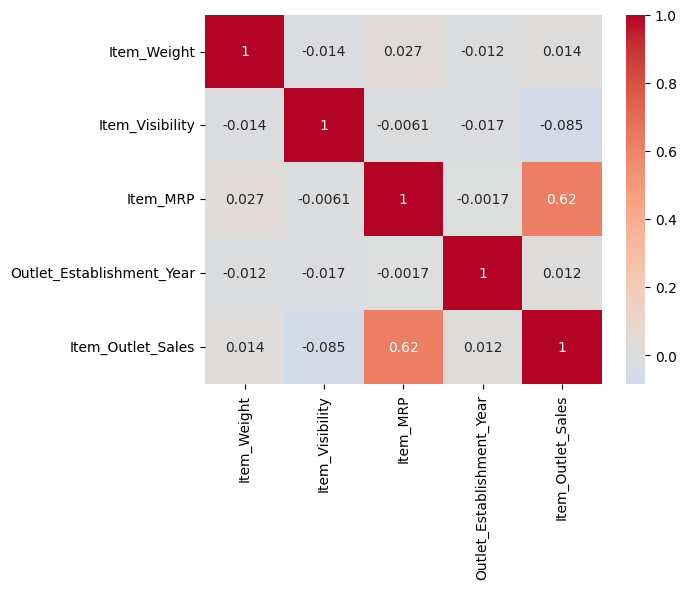

In [15]:
# Crear una matriz de correlación para el conjunto de datos "tips"
correlation_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

Graficos de dispercion

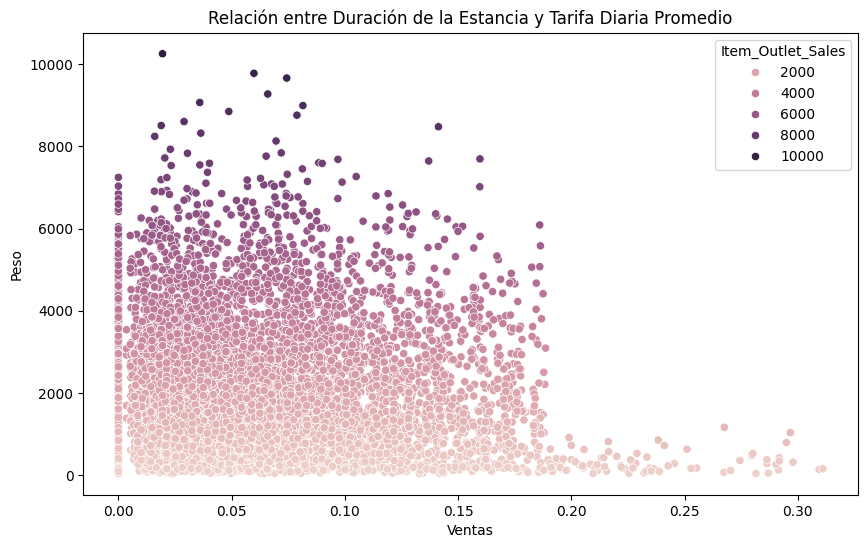

In [11]:
df_sort_weigth = df.sort_values(by = 'Item_Weight',ascending=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue="Item_Outlet_Sales", data=df_sort_weigth)
plt.title('Relación entre Duración de la Estancia y Tarifa Diaria Promedio')
plt.xlabel('Ventas')
plt.ylabel('Peso')
plt.show()

In [12]:
gb_sales_sum_by_tipe = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
gb_sales_sum_by_tipe['Item_Outlet_Sales'] = gb_sales_sum_by_tipe['Item_Outlet_Sales']/1000000

In [13]:
gb_sales_sum_by_tipe = gb_sales_sum_by_tipe.sort_values(by = 'Item_Outlet_Sales',ascending=True)
gb_sales_sum_by_tipe

,Item_Outlet_Sales
Item_Type,
Seafood,0.128722
Breakfast,0.178104
Others,0.280482
Starchy Foods,0.301063
Hard Drinks,0.377067
Breads,0.437771
Meat,0.689281
Soft Drinks,0.735962
Health and Hygiene,0.835171


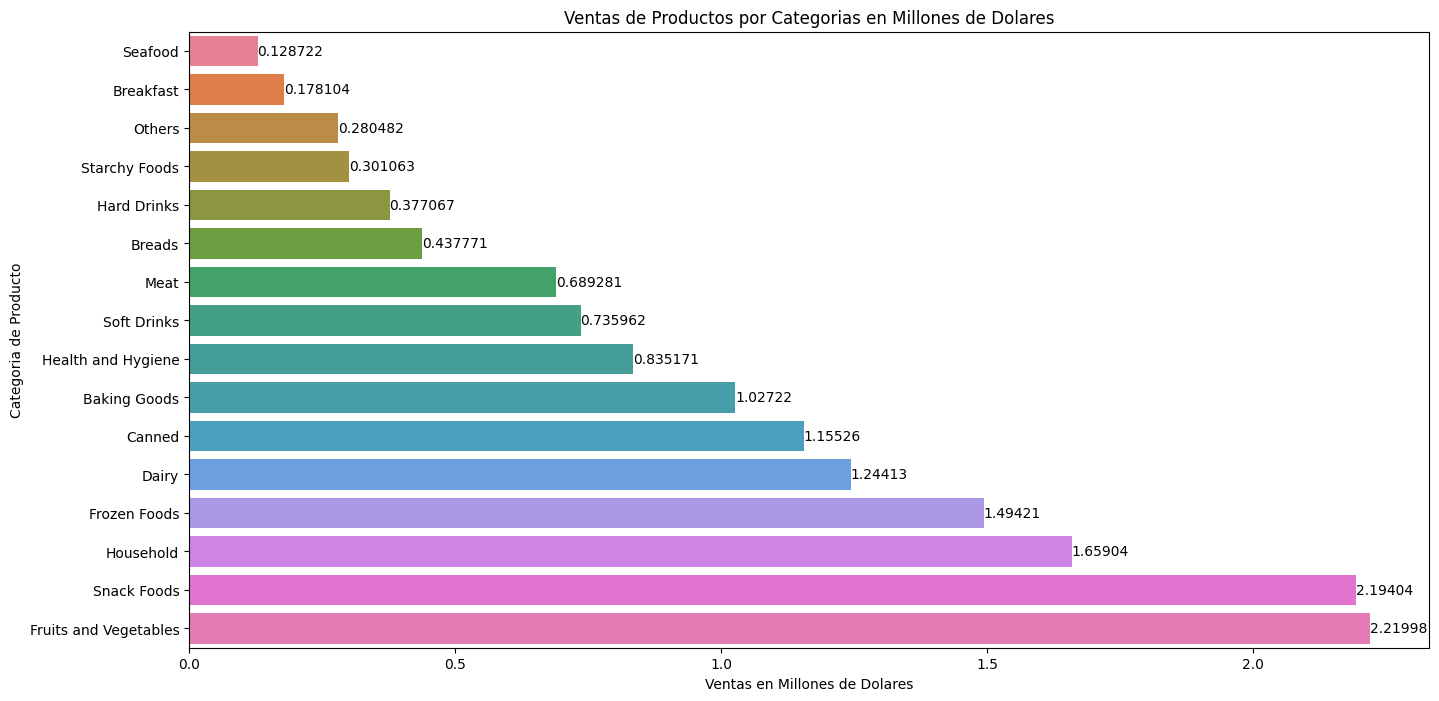

In [14]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(gb_sales_sum_by_tipe, x=gb_sales_sum_by_tipe['Item_Outlet_Sales'].values, y=gb_sales_sum_by_tipe.index , hue=gb_sales_sum_by_tipe.index, legend=False , orient = 'y')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Ventas de Productos por Categorias en Millones de Dolares')
plt.xlabel('Ventas en Millones de Dolares')
plt.ylabel('Categoria de Producto')

plt.show()

Se observa que el top 3 de productos que mas ingresos trae son las fruta y vegetales, snack foods y Household. Se analizara cada uno de estos productos.

In [16]:
df_fruit_vegetable = df[df['Item_Type'] == 'Fruits and Vegetables']
df_fruit_vegetable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Tier 1,Supermarket Type1,1589.2646
14,FDF32,16.350,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,Tier 3,Supermarket Type1,1977.4260
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,Tier 2,Supermarket Type1,3121.2704
...,...,...,...,...,...,...,...,...,...,...,...
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Tier 3,Grocery Store,45.2744
8497,FDT08,13.650,Low Fat,0.049209,Fruits and Vegetables,150.0050,OUT035,2004,Tier 2,Supermarket Type1,2247.0750
8503,FDQ44,20.500,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Tier 2,Supermarket Type1,3392.9168
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Tier 2,Supermarket Type1,2587.9646


<Axes: >

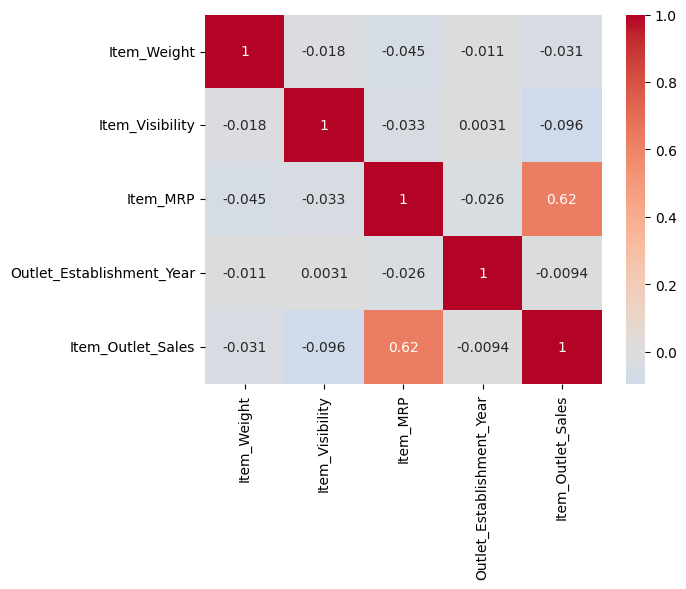

In [17]:
# Crear una matriz de correlación para el conjunto de datos "tips"
correlation_matrix = df_fruit_vegetable.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

In [27]:
df_fruit_vegetable_TipeOutlet = df_fruit_vegetable.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()/1000000
df_fruit_vegetable_TipeOutlet = df_fruit_vegetable_TipeOutlet.round(6).sort_values(by = 'Item_Outlet_Sales',ascending=True)
df_fruit_vegetable_TipeOutlet

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,0.024548
Supermarket Type2,0.263472
Supermarket Type1,1.931958


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

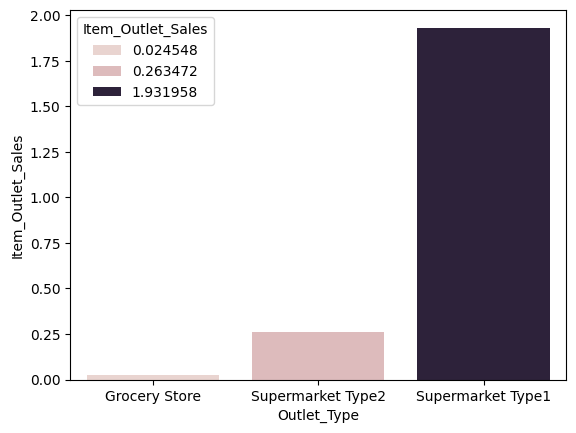

In [28]:
sns.barplot(df_fruit_vegetable_TipeOutlet, x=df_fruit_vegetable_TipeOutlet.index, y="Item_Outlet_Sales", hue = 'Item_Outlet_Sales')

Analizaremos por que el Supermarket Type 1 tiene tanto exito vendiendo este producto.

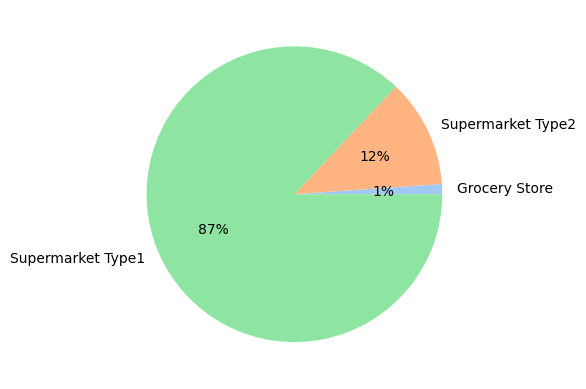

In [42]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(df_fruit_vegetable_TipeOutlet['Item_Outlet_Sales'], labels = df_fruit_vegetable_TipeOutlet.index , colors = colors, autopct='%.0f%%')
plt.show()

In [29]:
df_vegetables_supermarket1 = df[(df['Item_Type']== 'Fruits and Vegetables') & (df['Outlet_Type']== 'Supermarket Type1')]
df_vegetables_supermarket1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Tier 1,Supermarket Type1,1589.2646
14,FDF32,16.350,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,Tier 3,Supermarket Type1,1977.4260
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,Tier 2,Supermarket Type1,3121.2704
85,FDG20,15.500,Regular,0.126399,Fruits and Vegetables,177.0028,OUT017,2007,Tier 2,Supermarket Type1,2479.4392
...,...,...,...,...,...,...,...,...,...,...,...
8468,FDB20,7.720,Low Fat,0.052086,Fruits and Vegetables,76.8986,OUT045,2002,Tier 2,Supermarket Type1,467.3916
8481,FDT56,16.000,Regular,0.115827,Fruits and Vegetables,56.0246,OUT045,2002,Tier 2,Supermarket Type1,695.0952
8497,FDT08,13.650,Low Fat,0.049209,Fruits and Vegetables,150.0050,OUT035,2004,Tier 2,Supermarket Type1,2247.0750
8503,FDQ44,20.500,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Tier 2,Supermarket Type1,3392.9168


In [37]:
table_vegetables_supermarket1 = df_vegetables_supermarket1.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum().sort_values(by='Item_Outlet_Sales',ascending = True)
table_vegetables_supermarket1

,Item_Outlet_Sales
Outlet_Identifier,
OUT035,304647.4428
OUT046,304751.3076
OUT017,319504.1040
OUT045,326414.4422
OUT049,335113.7850
OUT013,341526.7706


<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

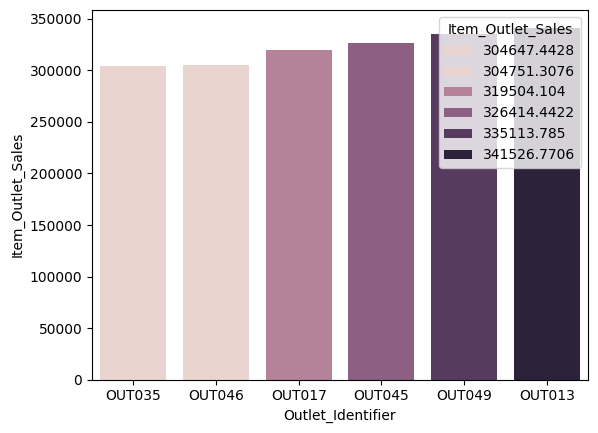

In [39]:
sns.barplot(table_vegetables_supermarket1, x=table_vegetables_supermarket1.index, y="Item_Outlet_Sales", hue = 'Item_Outlet_Sales')

Podemos conluir que los supermerkados del tipo 1 presentan ventas similares para el tipo de producto verduras y frutas. Ademas, que este tipo de supermarket tipo 1 abarca el 87% del mercado de verduras y frutas.

<Axes: >

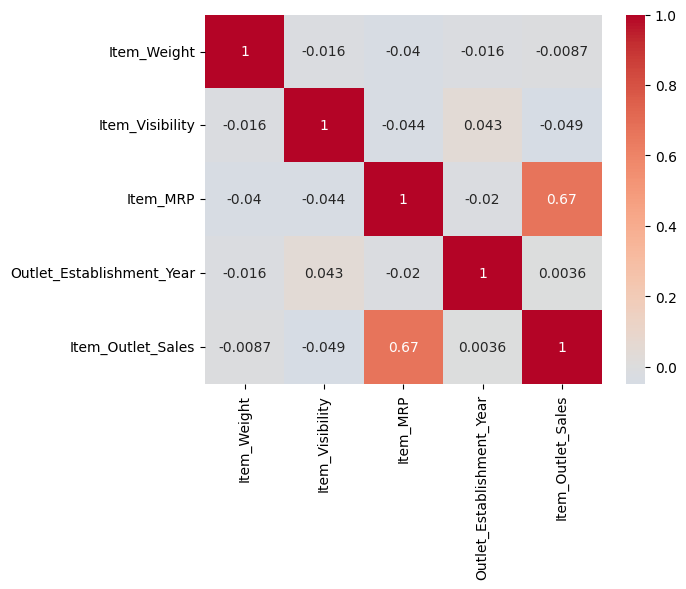

In [30]:
# Crear una matriz de correlación para el conjunto de datos "tips"
correlation_matrix = df_vegetables_supermarket1.corr(numeric_only=True)

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

Aumento la correlacion entre el item y el MRP, Se nalizara los locales esperando aumentar este numero.

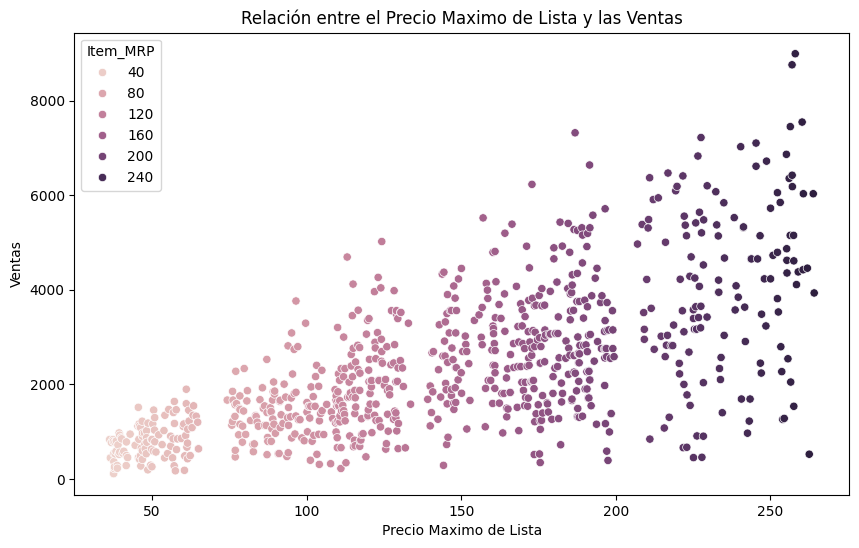

In [31]:
df_sort_vegetables_supermarket1 = df_vegetables_supermarket1.sort_values(by = 'Item_MRP',ascending=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue="Item_MRP", data=df_sort_vegetables_supermarket1)
plt.title('Relación entre el Precio Maximo de Lista y las Ventas')
plt.xlabel('Precio Maximo de Lista')
plt.ylabel('Ventas')
plt.show()

Podemos afirmar que mantener unos precios de lista entre 65 y 200 hacen que las ventas aumenten.

In [51]:
df_vegetables_supermarket1[(df_fruit_vegetable['Item_MRP']>=0)&(df_vegetables_supermarket1['Item_MRP']<=65)]

<ipython-input-51-20b011dcd148>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_vegetables_supermarket1[(df_fruit_vegetable['Item_MRP']>=0)&(df_vegetables_supermarket1['Item_MRP']<=65)]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266
93,FDA44,19.700,Low Fat,0.053213,Fruits and Vegetables,57.8930,OUT035,2004,Tier 2,Supermarket Type1,622.5230
195,FDT20,10.500,Low Fat,0.041395,Fruits and Vegetables,37.6164,OUT046,1997,Tier 1,Supermarket Type1,540.6296
252,FDV32,7.785,Low Fat,0.088846,Fruits and Vegetables,61.4510,OUT049,1999,Tier 1,Supermarket Type1,759.0120
377,FDF45,18.200,Regular,0.012195,Fruits and Vegetables,57.7904,OUT013,1987,Tier 3,Supermarket Type1,1464.7600
...,...,...,...,...,...,...,...,...,...,...,...
8096,FDQ08,15.700,Regular,0.018927,Fruits and Vegetables,60.2536,OUT035,2004,Tier 2,Supermarket Type1,1163.8184
8393,FDT20,10.500,Low Fat,0.041479,Fruits and Vegetables,36.8164,OUT045,2002,Tier 2,Supermarket Type1,772.3280
8431,FDA44,19.700,Low Fat,0.053331,Fruits and Vegetables,56.7930,OUT045,2002,Tier 2,Supermarket Type1,848.8950
8466,FDJ32,10.695,Low Fat,0.057744,Fruits and Vegetables,61.2536,OUT013,1987,Tier 3,Supermarket Type1,673.7896


Analizamos el segundo producto mas vendido

In [54]:
df_snack_food = df[df['Item_Type'] == 'Snack Foods']
df_snack_food

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
13,FDS46,17.600,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Tier 1,Supermarket Type1,2145.2076
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,Tier 3,Supermarket Type1,3775.0860
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Tier 2,Supermarket Type1,1065.2800
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.340,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,Tier 2,Supermarket Type1,1508.0370
8505,FDB46,10.500,Regular,0.094146,Snack Foods,210.8244,OUT018,2009,Tier 3,Supermarket Type2,2117.2440
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Tier 2,Supermarket Type1,7182.6504
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834


In [55]:
df_snack_food_TipeOutlet = df_snack_food.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()/1000000
df_snack_food_TipeOutlet = df_snack_food_TipeOutlet.round(6).sort_values(by = 'Item_Outlet_Sales',ascending=True)
df_snack_food_TipeOutlet

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,0.025943
Supermarket Type2,0.278715
Supermarket Type1,1.889387


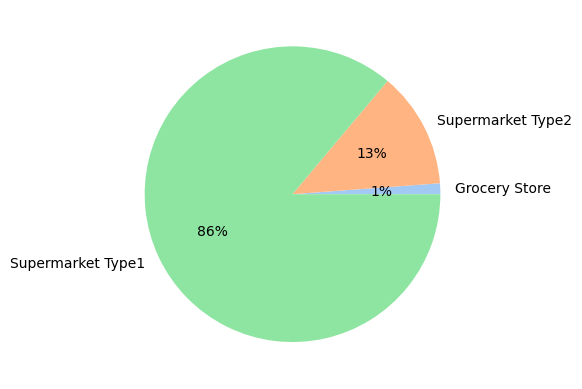

In [56]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(df_snack_food_TipeOutlet['Item_Outlet_Sales'], labels = df_snack_food_TipeOutlet.index , colors = colors, autopct='%.0f%%')
plt.show()

Se observa una predominancia del supermarket Type 1.

**Se analizara los tipos de outlet**

In [ ]:
df_outlet_supermarket1 = df[df['Outlet_Type'] == 'Supermarket Type1']
df_outlet_supermarket1

In [58]:
gb_sales_sum_by_tipe = df_outlet_supermarket1.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
gb_sales_sum_by_tipe['Item_Outlet_Sales'] = gb_sales_sum_by_tipe['Item_Outlet_Sales']/1000000

In [59]:
gb_sales_sum_by_tipe = gb_sales_sum_by_tipe.sort_values(by = 'Item_Outlet_Sales',ascending=True)
gb_sales_sum_by_tipe

,Item_Outlet_Sales
Item_Type,
Seafood,0.105608
Breakfast,0.151527
Others,0.240153
Starchy Foods,0.265218
Hard Drinks,0.323554
Breads,0.375509
Meat,0.581045
Soft Drinks,0.638025
Health and Hygiene,0.712755


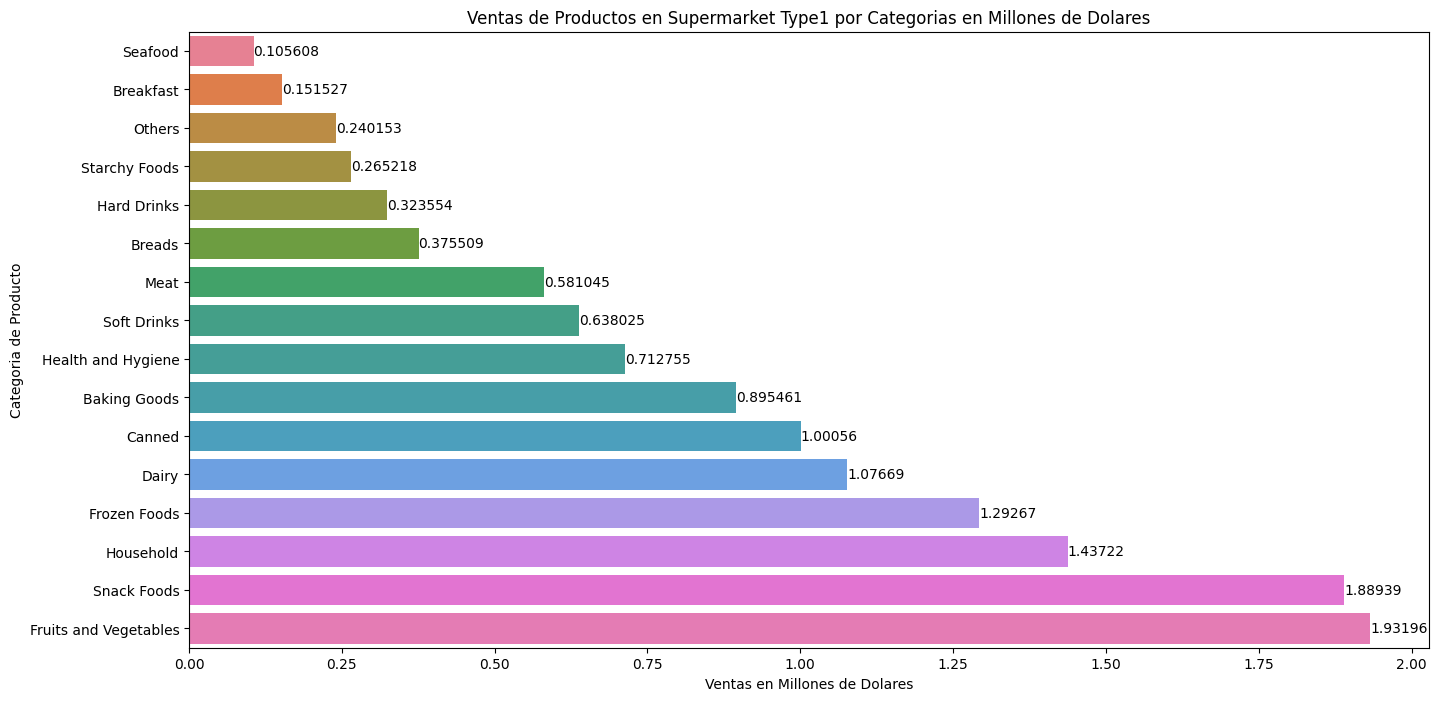

In [61]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(gb_sales_sum_by_tipe, x=gb_sales_sum_by_tipe['Item_Outlet_Sales'].values, y=gb_sales_sum_by_tipe.index , hue=gb_sales_sum_by_tipe.index, legend=False , orient = 'y')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Ventas de Productos en Supermarket Type1 por Categorias en Millones de Dolares')
plt.xlabel('Ventas en Millones de Dolares')
plt.ylabel('Categoria de Producto')

plt.show()

Se observa que es similar al grafico realizado con todos los tipos de markets.
Podemos concluir que los productos con un mayor mecado son Snack Foods, Fruits and Vegetables y Household.

In [62]:
df_outlet_supermarket2 = df[df['Outlet_Type'] == 'Supermarket Type2']

In [63]:
gb_sales_sum_by_tipe = df_outlet_supermarket2.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
gb_sales_sum_by_tipe['Item_Outlet_Sales'] = gb_sales_sum_by_tipe['Item_Outlet_Sales']/1000000

In [66]:
gb_sales_sum_by_tipe = gb_sales_sum_by_tipe.sort_values(by = 'Item_Outlet_Sales',ascending=True)

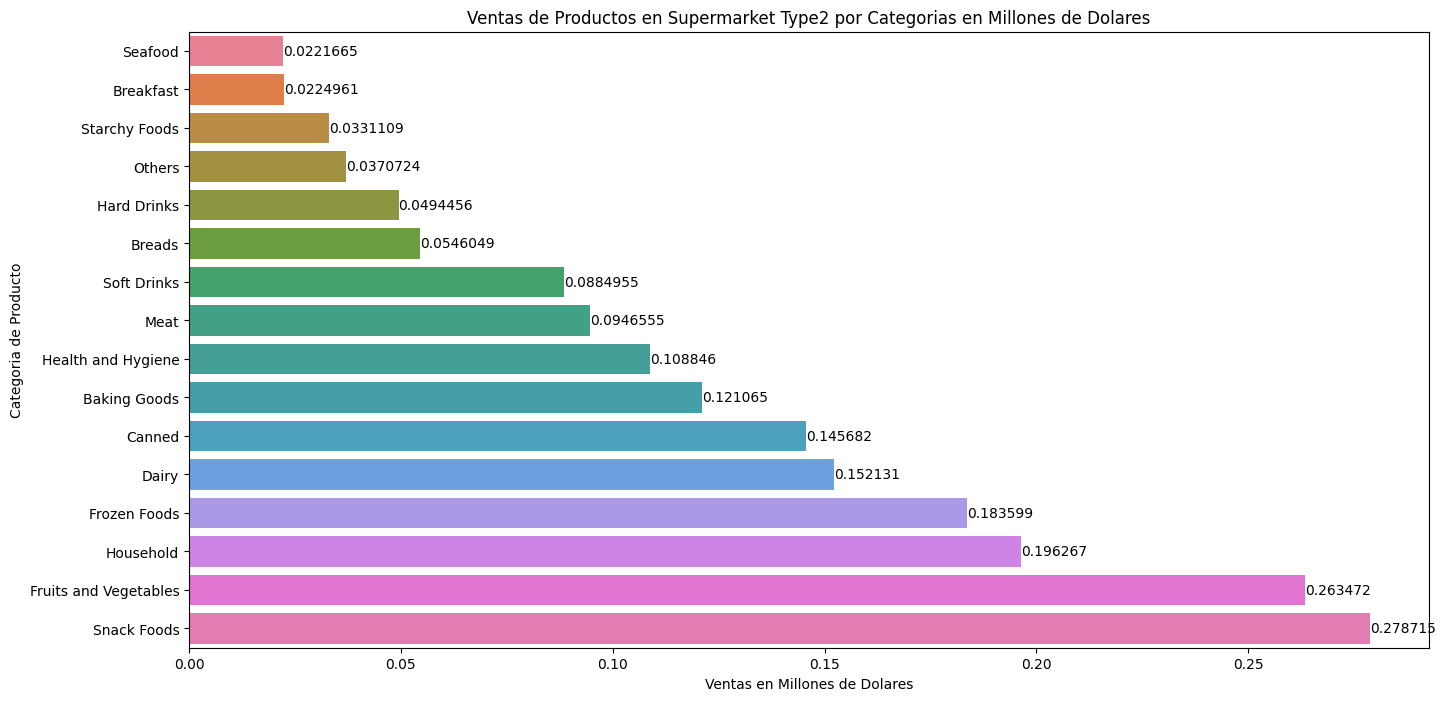

In [65]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(gb_sales_sum_by_tipe, x=gb_sales_sum_by_tipe['Item_Outlet_Sales'].values, y=gb_sales_sum_by_tipe.index , hue=gb_sales_sum_by_tipe.index, legend=False , orient = 'y')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Ventas de Productos en Supermarket Type2 por Categorias en Millones de Dolares')
plt.xlabel('Ventas en Millones de Dolares')
plt.ylabel('Categoria de Producto')

plt.show()

Podemos concluir que los productos con un mayor mecado son Snack Foods, Fruits and Vegetables y Household.

In [67]:
df_outlet_supermarket2 = df[df['Outlet_Type'] == 'Grocery Store']

In [68]:
gb_sales_sum_by_tipe = df_outlet_supermarket2.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
gb_sales_sum_by_tipe['Item_Outlet_Sales'] = gb_sales_sum_by_tipe['Item_Outlet_Sales']/1000000

In [69]:
gb_sales_sum_by_tipe = gb_sales_sum_by_tipe.sort_values(by = 'Item_Outlet_Sales',ascending=True)

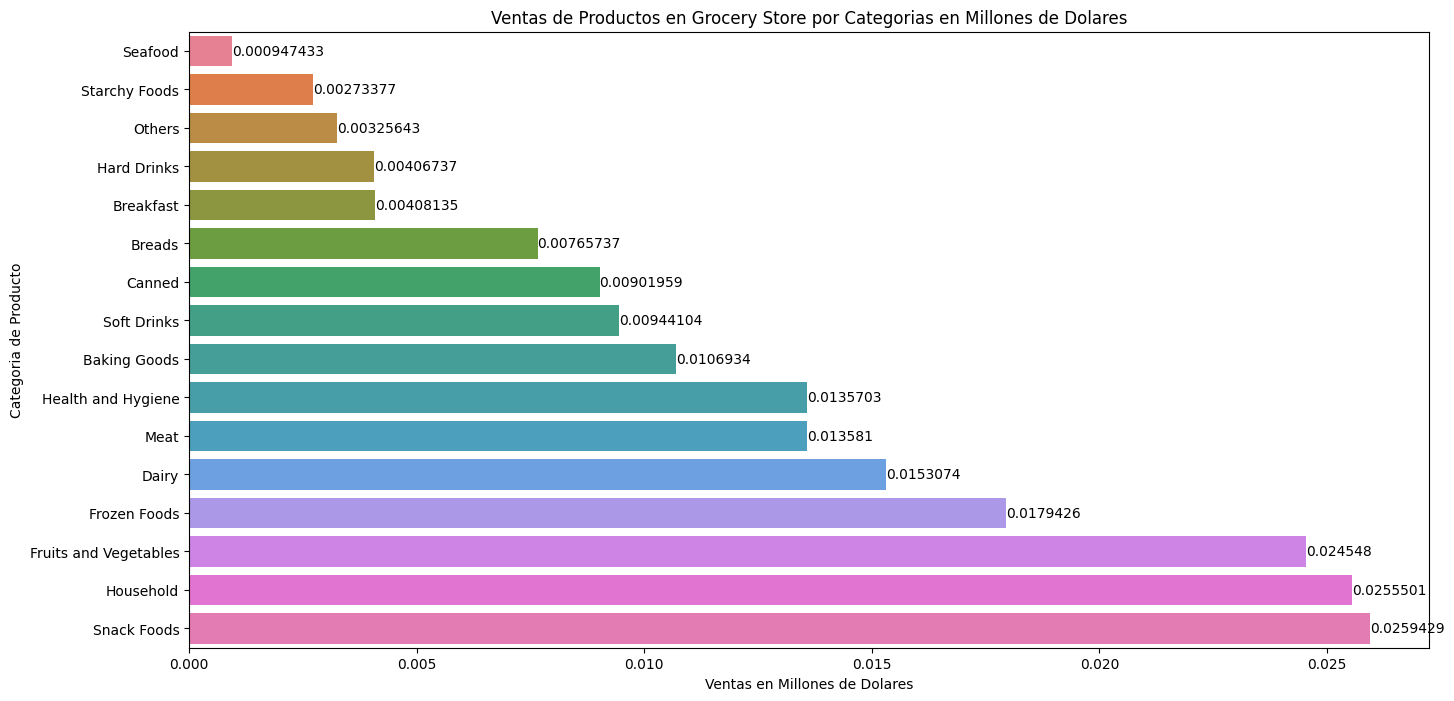

In [73]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(gb_sales_sum_by_tipe, x=gb_sales_sum_by_tipe['Item_Outlet_Sales'].values, y=gb_sales_sum_by_tipe.index , hue=gb_sales_sum_by_tipe.index, legend=False , orient = 'y')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Ventas de Productos en Grocery Store por Categorias en Millones de Dolares')
plt.xlabel('Ventas en Millones de Dolares')
plt.ylabel('Categoria de Producto')

plt.show()

Podemos concluir que los productos con un mayor mecado son Snack Foods, Fruits and Vegetables y Household.

In [71]:
df_TipeOutlet = df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()/1000000
df_TipeOutlet = df_TipeOutlet.round(6).sort_values(by = 'Item_Outlet_Sales',ascending=True)
df_TipeOutlet

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,0.188340
Supermarket Type2,1.851823
Supermarket Type1,12.917342


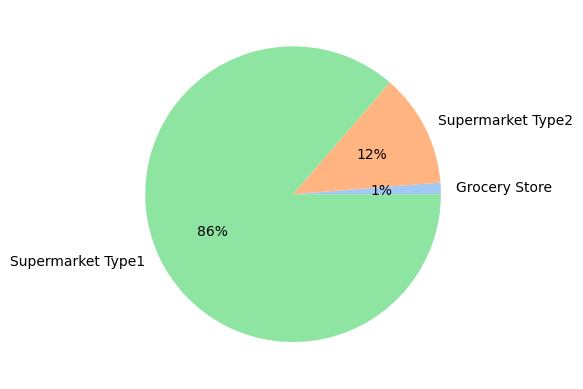

In [72]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(df_TipeOutlet['Item_Outlet_Sales'], labels = df_TipeOutlet.index , colors = colors, autopct='%.0f%%')
plt.show()

Se observa que los Supermarket Type 1 representa un 86% de las ventas.